# Bike Trippin

For this assignment, you will be taking "Cycle Share" data from Seattle and creating charts to determine which gender borrows and uses bikes more often.

* Import your dependencies and then import your data into a pandas data frame from the CSV within the 'Data' folder
* Split up your data into groups based upon the gender column
    * NOTE: There will be a garbage row with a gender of 'stoptime' which you will have to remove!
* Chart your data using a bar graph, giving it both a title and labels for the axes

In [1]:
%matplotlib notebook

In [2]:
# Import Dependencies
import pandas as pd

# pyplot
import matplotlib.pyplot as plt

# pandas

# numpy (if you need it)

In [3]:
# Import data into pandas from CSV
biketripDF = pd.read_csv("../Resources/trip.csv", low_memory=False)

# Preview your DataFrame
biketripDF


,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971
...,...,...,...,...,...,...,...,...,...,...
286853,8/31/2016 23:45,SEA00201,679.532,Harvard Ave & E Pine St,2nd Ave & Spring St,CH-09,CBD-06,Short-Term Pass Holder,NaN,NaN
286854,9/1/2016 0:20,SEA00247,1965.418,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286855,9/1/2016 0:20,SEA00300,1951.173,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286856,9/1/2016 0:20,SEA00047,1883.299,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN


<IPython.core.display.Javascript object>


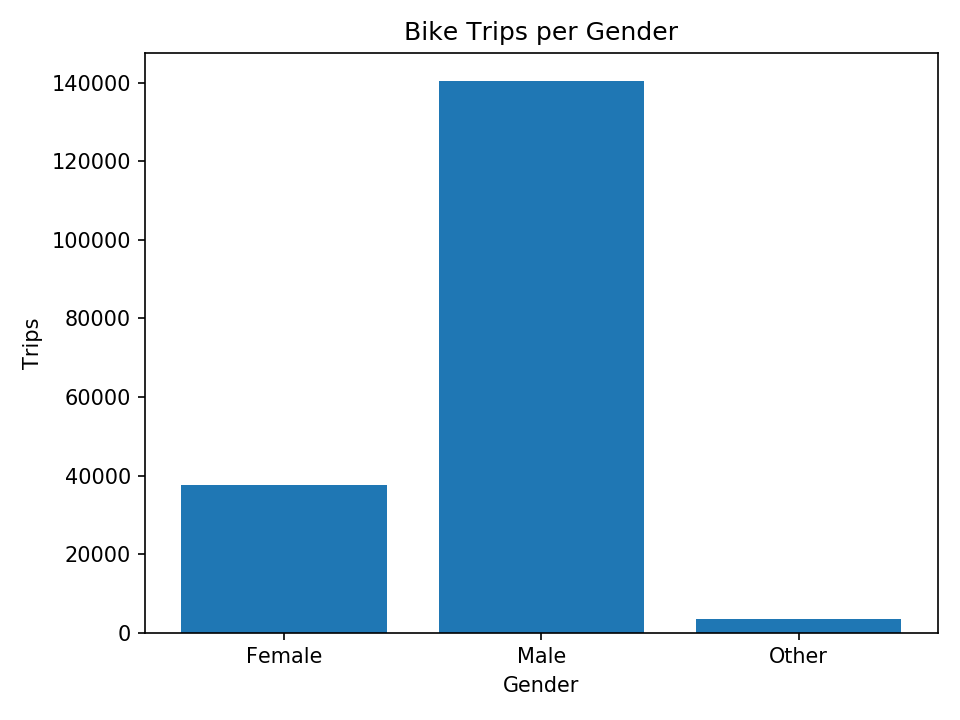

In [4]:
# Split up our data into groups based upon 'gender'
biketripDFgrouped = biketripDF.groupby(["gender"])

# Find out how many of each gender took bike trips
biketripDFcount = biketripDFgrouped.count()

# # Drop the 'stoptime' row that is contained within our group
biketripDFcount = biketripDFcount.drop("stoptime", axis=0)
biketripDFcount = biketripDFcount["stoptime"].to_frame()
biketripDFcount = biketripDFcount.reset_index(["gender"])
biketripDFcount = biketripDFcount.rename(columns={"stoptime": "counts"})

# # Use plt.figure() to instantiate a new plot
plt.figure()

# # Chart our data, give it a title, and label the axes
plt.bar(biketripDFcount["gender"], biketripDFcount["counts"])
plt.title("Bike Trips per Gender")
plt.xlabel("Gender")
plt.ylabel("Trips")

# # Display your chart with a tight layout
plt.tight_layout()

plt.show()
# biketripDFcount

In [5]:
# Place our data into groups based upon 'bikeid' and 'gender
bikeidDFgrouped = biketripDF.groupby(["bikeid", "gender"])

# Create a new variable that holds the sum of our groups
bikeidsummed = bikeidDFgrouped.sum()

# Preview your grouped DataFrame
bikeidsummed

tripduration
bikeid   gender              
SEA00001 Female     15876.665
         Male       41150.373
         Other        276.880
SEA00005 Female     20616.240
         Male       60386.328
...                       ...
SEA00499 Male      160881.803
         Other       4712.502
SEA00500 Female     53074.638
         Male      207846.090
         Other       4123.578

[1458 rows x 1 columns]

In [6]:
# Make a variable called bike_id and store a 'bikeid' in it
# Hint: Pick any of the values from the bikeid column

bike_id = input("Please specify a bike id: ")
# bike_id = "SEA00001"

Please specify a bike id: SEA00001


<IPython.core.display.Javascript object>


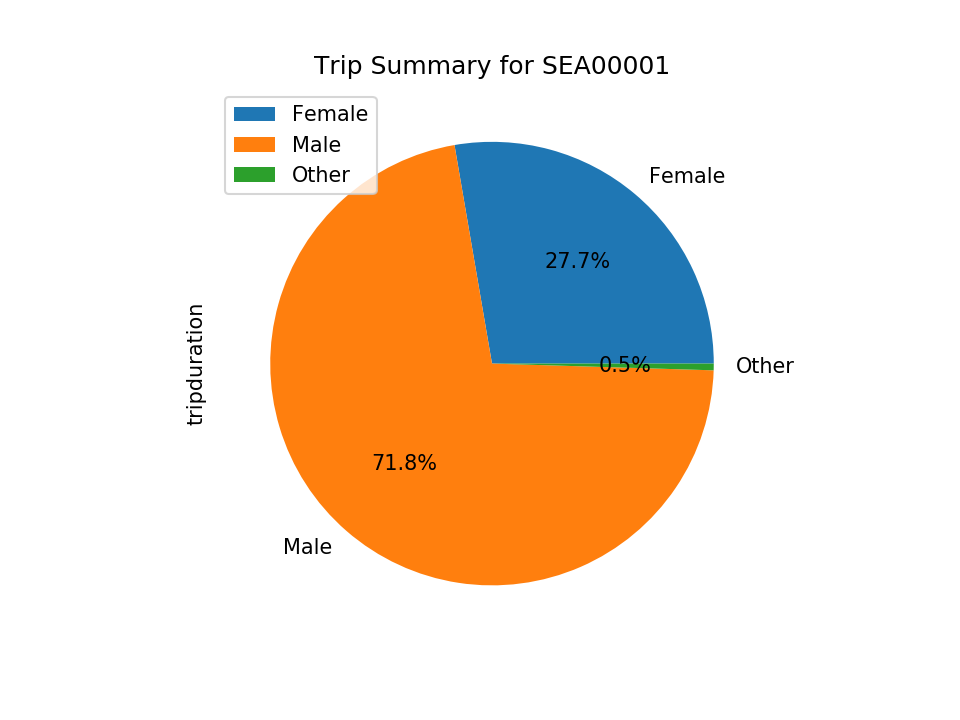

In [7]:
# Collect the trips of the 'bikeid' above (there are several ways to do this, but consider using `loc`)
bike_id_trips = bikeidsummed.loc[bike_id]

# Place the gender keys for that single bike into a list
# Hint: use the .keys() function
genderkeys = list(bike_id_trips.index.values)

# Create a pie chart based upon the trip duration of that single bike
bike_id_trips.plot.pie(y="tripduration", autopct="%1.1f%%")

# Use an f-string to create the label
plt.title(f"Trip Summary for {bike_id}")

# Show the chart in tight layout
plt.show()